In [1]:
import torch
import circuits as ckt
from circuits import Element,Kinds
from models import Solver
from models import State
from data import Input,Process

In [2]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=2, linewidth=200)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

In [3]:
vr = ckt.Circuit()

source = Element(circuit=vr,kind=Kinds.IVS,attr=1,i=-10)
load =Element(circuit=vr,kind=Kinds.R)

vr.ring(source,load,3)
vr

Circuit with 4 nodes and 4 elements

In [4]:
vr.elements

[(IVS, 3, 0), (R, 1, 0), (R, 2, 1), (R, 3, 2)]

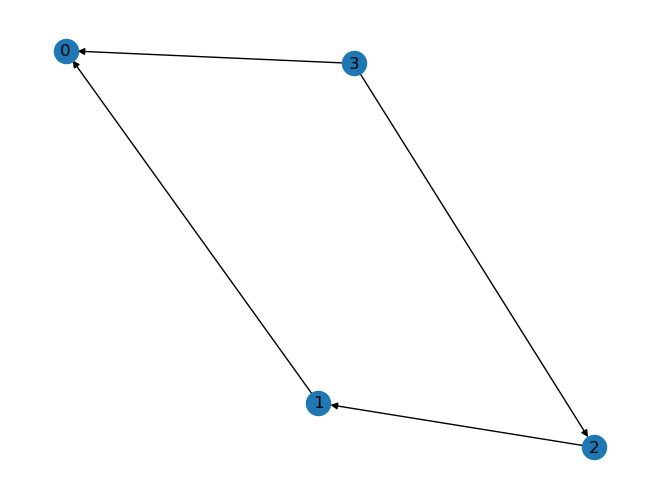

In [5]:
vr.draw()

In [6]:
input = Input(vr)

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:73: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


In [7]:
model = Solver(input=input,attr=input.attr_param, state=State.Solve)
model.attr

Parameter containing:
tensor([[1.00],
        [0.38],
        [0.70],
        [0.03]], requires_grad=True)

In [8]:

X = model()
X

tensor([[-0.90],
        [ 0.90],
        [ 0.90],
        [ 0.90],
        [ 1.00],
        [ 0.35],
        [ 0.63],
        [ 0.03],
        [-0.35],
        [ 0.65],
        [ 0.03]], grad_fn=<LinalgSolveExBackward0>)

In [9]:
input.ivp_inputs()

tensor([[-10.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]])

In [10]:
input.ivp_knowns_mask()

tensor([[ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [11]:
input.circuit.A_edge()

tensor([[1, 0, 1],
        [1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]])

In [12]:
process = Process(input)

In [13]:
errors = process.errors(X)
errors

tensor([[-9.10],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00],
        [ 0.00]], grad_fn=<IndexPutBackward0>)

In [14]:
process.diffuse(X)

tensor([[-18.20,  -9.10,  -9.10,   0.00]], grad_fn=<MmBackward0>)